In [41]:
import rasterio
import numpy

dataset = rasterio.open("./data/fao/hwsd/HWSD_RASTER/hwsd.bil")

print("type of the dataset :", type(dataset))
print("shape :", dataset.shape)
print("number of bands :", dataset.count)

raster = dataset.read(1)

print("\ntype of the band :", type(raster))
print("min value :", numpy.min(raster))
print("max value :", numpy.max(raster))

set_ = set()
for row in raster:
    for element in row:
        set_.add(element)

print("number of unique values :", len(set_))

type of the dataset : <class 'rasterio.io.DatasetReader'>
shape : (21600, 43200)
number of bands : 1

type of the band : <class 'numpy.ndarray'>
min value : 0
max value : 32050
number of unique values : 16328


In [42]:
import pyodbc
import pandas

MDB = './data/fao/hwsd/HWSD.mdb'
DRV = '{Microsoft Access Driver (*.mdb, *.accdb)}'

con = pyodbc.connect('DRIVER={};DBQ={}'.format(DRV,MDB))
cur = con.cursor()
rows = cur.execute('SELECT * FROM HWSD_DATA;').fetchall()

columns = [column[0] for column in cur.description]

cur.close()
con.close()

df = pandas.DataFrame((tuple(t) for t in rows))
df.columns = columns
df

,ID,MU_GLOBAL,MU_SOURCE1,MU_SOURCE2,ISSOIL,SHARE,SEQ,SU_SYM74,SU_CODE74,SU_SYM85,...,S_OC,S_PH_H2O,S_CEC_CLAY,S_CEC_SOIL,S_BS,S_TEB,S_CACO3,S_CASO4,S_ESP,S_ECE
0,2,7002,2,2.0,0,100.0,1,None,NaN,HD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,7003,3,3.0,0,100.0,1,None,NaN,WR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,7004,4,4.0,0,100.0,1,None,NaN,Od,...,32.89,4.6,71.0,78.0,40.0,27.4,0.0,0.0,1.0,0.1
3,5,7005,5,5.0,0,100.0,1,None,NaN,GG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,7006,70001,70001.0,1,70.0,1,None,NaN,Tv,...,1.85,5.9,146.0,10.0,23.0,5.3,0.0,0.0,1.0,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48143,48145,32049,TN249,NaN,1,20.0,4,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48144,48146,32050,TN250,NaN,1,50.0,1,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48145,48147,32050,TN250,NaN,1,30.0,2,None,NaN,None,...,0.13,8.5,37.0,3.0,100.0,3.1,5.7,0.1,4.0,1.0
48146,48148,32050,TN250,NaN,1,20.0,3,None,NaN,None,...,0.18,8.7,27.0,4.0,90.0,3.6,3.0,0.2,2.0,0.1


In [43]:
set_ = set()
for element in df['MU_GLOBAL']:
    set_.add(element)
print("number of unique values in MU_GLOBAL column :", len(set_))

number of unique values in MU_GLOBAL column : 16327


             AREA   PERIMETER  CNT1M_1_  CNT1M_1_ID  \
0      649.422101  900.013634         2           1   
1        0.002037    0.262890         3           2   
2        0.052469    1.545726         4           3   
3        0.142221    4.510463         5           4   
4        0.000403    0.147693         6           5   
...           ...         ...       ...         ...   
27267    0.002517    0.230589     27269       21874   
27268    0.004243    0.286990     27270       21875   
27269    0.001678    0.246273     27271       21876   
27270    0.000552    0.116021     27272       21877   
27271    0.005670    0.387218     27273       21878   

                        FAO_NAME  FAO_CODE  UN_CODE ISO_CODE  \
0                      Greenland        85      304       GL   
1                      Greenland        85      304       GL   
2                      Greenland        85      304       GL   
3                      Greenland        85      304       GL   
4                  

<Axes: >

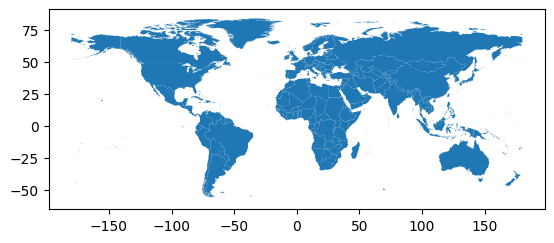

In [44]:
import geopandas as gpd

shapefile = gpd.read_file("./data/fao/hwsd/viewer_files/Country.shp")

print(shapefile)

shapefile.plot()

             AREA   PERIMETER  CNT1M_1_  CNT1M_1_ID FAO_NAME  FAO_CODE  \
13576  261.423441  172.438077     13578       27414    India       100   
15442    0.000949    0.116656     15444       26966    India       100   
15446    0.000087    0.042329     15448       26968    India       100   
15479    0.000085    0.038179     15481       26976    India       100   
15483    0.000414    0.119283     15485       26977    India       100   
...           ...         ...       ...         ...      ...       ...   
19166    0.003755    0.336338     19168       26355    India       100   
19167    0.012934    0.643194     19169       26356    India       100   
19243    0.011567    0.583529     19245       26388    India       100   
19287    0.079163    1.721111     19289       26407    India       100   
19291    0.000191    0.063179     19293       26410    India       100   

       UN_CODE ISO_CODE CNTRY_NAME ISO3_CODE  \
13576      356       IN      India       IND   
15442      356 

<Axes: >

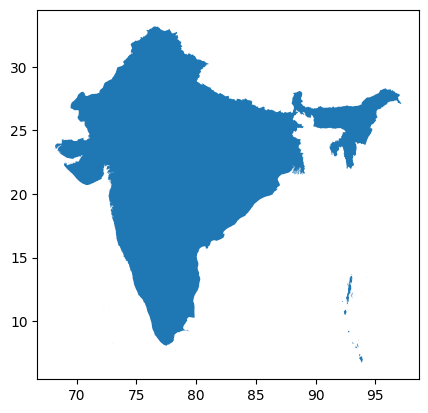

In [45]:
indian_areas = shapefile[shapefile['FAO_NAME'] == 'India']

print(indian_areas)

indian_areas.plot()

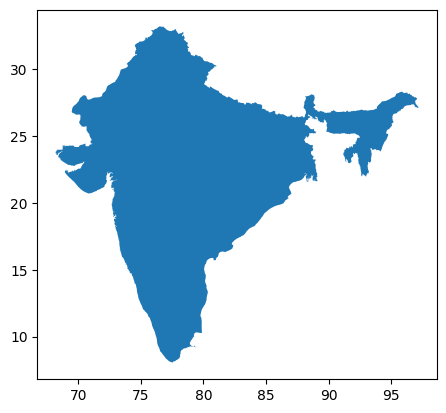

In [68]:
indian_area = shapefile[shapefile['CNT1M_1_'] == 13578]
indian_area.plot()

#geometry = shapefile['geometry'].iloc[indian_area.index[0]]

In [67]:
#from shapely.geometry import Point
import math
from scipy.interpolate import interp1d

#from_raster_to_shapefile_i = interp1d([0, 21600], [90, -90])
#from_raster_to_shapefile_j = interp1d([0, 43200], [-180, 180])
from_shapefile_to_raster_i = interp1d([90, -90], [0, 21600])
from_shapefile_to_raster_j = interp1d([-180, 180], [0, 43200])

sum = 0
cont = 0

for i in range(int(from_shapefile_to_raster_i(34)), int(from_shapefile_to_raster_i(8))):
    print("\r" + str(i), end="")
    for j in range(int(from_shapefile_to_raster_j(68)), int(from_shapefile_to_raster_j(90))):
        #point = Point(from_raster_to_shapefile_j(j), from_raster_to_shapefile_i(i))
        #if point.within(geometry):  # time consuming
        for index in df[df['MU_GLOBAL'] == raster[i][j]].index:
            soc = df['T_OC'].iloc[index]
            if not math.isnan(soc):
                sum += soc
                cont += 1

print("\r", end="")
print(sum / cont, cont)

1.2252868198398223 16489614
